<a href="https://colab.research.google.com/github/LeoMajorR/Python/blob/master/CS230.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<BarContainer object of 38 artists>

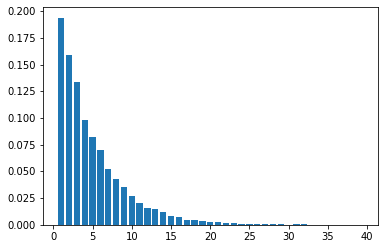

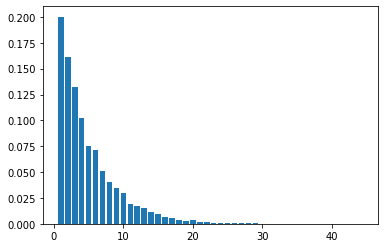

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def count_frequencies( data, relative = True):
    counter = {} # dictionary
    
    for element in data:
        if element not in counter:
            counter[element]=1
        else:
            counter[element]+=1
    if relative == True:
        for element in counter:
            counter[element] = counter[element] / len(data)
    return counter

def generateGeometricSamples(p=0.2,reps = 10000):
    samples = np.random.geometric(p,reps)
    return samples

def generateGeometricSamplesConditional(p=0.2, k=3, reps = 20000):
    samples = np.random.geometric(p,reps)
    samples = samples[samples>k] #only take samples where samples > k
    samples -= k
    return samples

reps = 10000
p=0.2
samples1 = generateGeometricSamples(p,reps)

samples2 = generateGeometricSamplesConditional(p) # simulate x-k|X>k
samples2 = samples2[:reps]

freq1 = count_frequencies(samples1)
freq2 = count_frequencies(samples2)

plt.figure(0)
plt.bar(freq1.keys(), freq1.values())
plt.figure(1)
plt.bar(freq2.keys(), freq2.values())

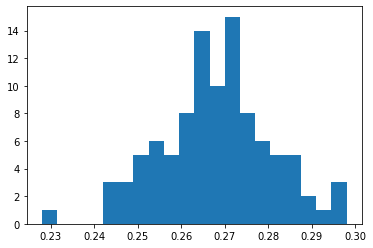

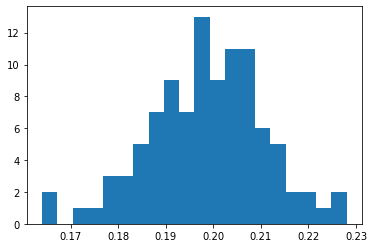

0.25952595259525946


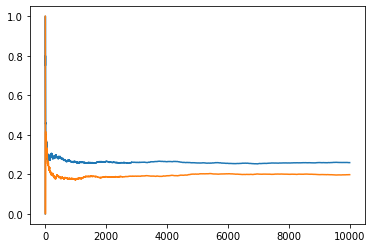

In [2]:
#monty hall 5 door, 1 door opened variant
import numpy as np
import matplotlib.pyplot as plt
def runOneSample(doors):
    switch_reward =0
    no_switch_reward = 0
    
    # prize door is fixed
    # independently 
    currsample = np.random.choice(doors,p=[1/5]*5) #door behind which there is prize
    playerchsample = np.random.choice(doors,p=[1/5]*5) #choice made by the player
    
    #compute the winning if candidate switches or otherwise
    if(currsample == playerchsample):        
        no_switch_reward = 1 #you will win if you use no switch strategy
    else:
        residue = doors[doors!=currsample]  # game show host cannot show the prize 
        residue = residue[residue!=playerchsample]  #game show host cannot show the players choice      
        doorShown = np.random.choice(residue, replace=False) #this is door chosen by game show host
        #player cannot choose the original door if he is switching       
        residue = doors[doors!=playerchsample] # we are starting afresh!!
        #he cannot choose the door which was shown to him
        residue = residue[residue!=doorShown]        
        playerch2 = np.random.choice(residue, replace=False)
        #print(currsample, playerchsample, doorShown, playerch2)        
        if playerch2 == currsample:
            switch_reward += 1 # he will win when he chooses the prize
        
        
    return switch_reward, no_switch_reward

def runMultipleMethod1(doors, reps=1000):
    csr =0
    cnsr = 0
    for idx in range(reps):
        tsr, tnsr = runOneSample(doors)
        #UPDATE csr and cnsr
        csr += tsr
        cnsr += tnsr
    return csr/reps,cnsr/reps

def runSimulationMethod1(doors):
    outerReps = 100
    sr = np.zeros(outerReps)
    nsr = np.zeros(outerReps)
    for oRidx in range(outerReps):
        tsr,tnsr = runMultipleMethod1(doors)
        #UPDATE sr and nsr
        sr[oRidx] = tsr
        nsr[oRidx] = tnsr
    plt.hist(sr,20)
    plt.show()
    plt.hist(nsr,20)
    plt.show()

def runSimulationMethod2(doors,reps = 10000):    
    sr = np.zeros(reps)
    nsr = np.zeros(reps)
    for idx in range(reps):
        tsr, tnsr = runOneSample(doors)
        if idx ==0:
            sr[idx] = tsr
            nsr[idx]= tnsr
        else:
            #Update current estimate
            sr[idx] = (sr[idx-1]*(idx-1) + tsr)/idx
            nsr[idx] = (nsr[idx-1]*(idx-1) + tnsr)/idx
    plt.plot(np.array(range(1,reps+1)), sr) 
    plt.plot(np.array(range(1,reps+1)), nsr) 
    print(sr[-1])

doors = np.array([1,2,3,4,5])  
runSimulationMethod1(doors)  
runSimulationMethod2(doors)






    
    


In [7]:
#monty hall 5 door, 1 door opened variant
import numpy as np
import matplotlib.pyplot as plt
def runOneSample(classSize = 40, yearSize = 365):
    duplicate_birthday_found = False
    birthdays = np.random.choice(np.array(range(yearSize)),classSize, replace=True)
    #unArr, countArr = np.unique(birthdays, return_counts=True)
    #if len(unArr[countArr>1]) != 0:
    uniqBirthdays = np.unique(birthdays)
    if len(birthdays) != len(uniqBirthdays):
        duplicate_birthday_found = True
    return duplicate_birthday_found

def runMultiple(classSize = 40, yearSize = 365,reps =1000):
    birthdayEstProb =0
    for idx in range(reps):
        if runOneSample(classSize, yearSize) == True:
            birthdayEstProb += 1
    return birthdayEstProb/ reps

def runSimulation(classSize = 40, yearSize = 365):
    outerReps = 1000
    ests = np.zeros(outerReps)
    for oRidx in range(outerReps):
        ests[oRidx] = runMultiple(classSize, yearSize)             
    plt.hist(ests,45)
    plt.show()


runSimulation()


Streaming output truncated to the last 5000 lines.
 350   7 157 232]
birthday -  [108 260 114 351 157 316 333 160 318 204 156 243 329 197 317 253 195   3
 226 119  21  27 200  31 329  82  27 281 114  21 286  75 214 335 305  63
 314  39 264 256]
birthday -  [ 26 289  71  24 110 228 243  10  88 218  45 334 148 363  11 124 170  43
 215  67  44  26 121 222 151  11  26 132 196 130 201 126  54 292 215 362
 235 128  85 104]
birthday -  [199 281 307  12  47 358 228  12 116 224  48 177 228 152 176 190 287 219
  56  17 338 253 358  88 295   9  44  29 256 143 133  45 180 245 289 160
 172 151  99 204]
birthday -  [307 347 165 342  78 285 229 126  25  27 249 312 118 204 310   3 160 230
  62 125  16  79 180  51 280 308 123 152 262 193 110  43 116 202  31 244
  16 106 115  11]
birthday -  [144 326 274 342 160  82 101 282 257 191 302 113 307 228 203 285  55 289
  63 125  68 120 231 250 321 133 276 222   5 223  23 324  61 302  36 348
 352 211 317 248]
birthday -  [232 187 126 222 238 162 122 110 248 24

KeyboardInterrupt: ignored